In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
os.chdir('C://Users//Thanis//Desktop//Data Science//Machine Learing//Housing')

In [3]:
h_train = pd.read_csv('wk3_kc_house_train_data.csv')
h_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [18]:
h_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [21]:
h_train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

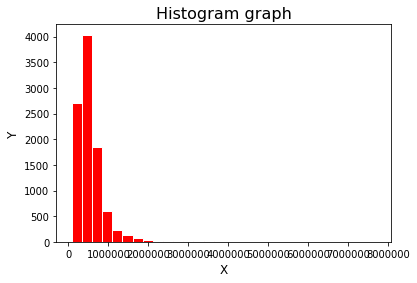

In [31]:
h_train.hist(column='price', grid=False, figsize = (6,4), color = 'red', edgecolor= 'white', bins=30)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.title('Histogram graph', fontsize = 16)
plt.show()

In [24]:
import seaborn as sns

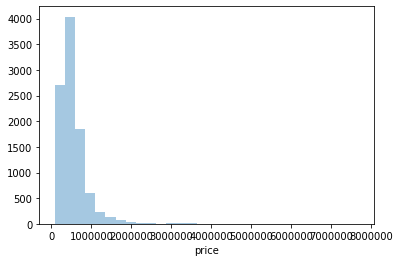

In [32]:
sns.distplot(h_train['price'],kde = False, bins = 30)

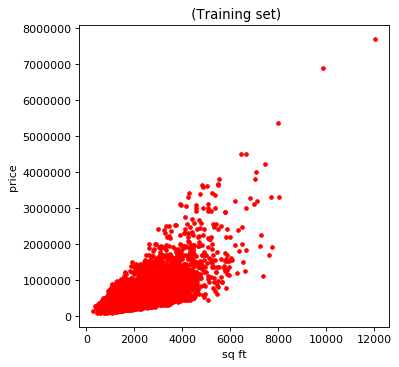

In [52]:
plt.figure(figsize=(5, 5), dpi=80)
plt.scatter(h_train['sqft_living'],h_train['price'], s=10,color = "red")
#plt.scatter(X_test, y_test, s=10,color = "black")
plt.title(" (Training set)")
plt.xlabel("sq ft")
plt.ylabel("price")
plt.show()

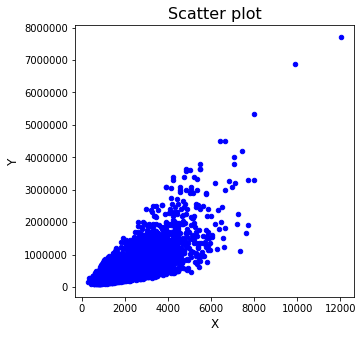

In [39]:
h_train.plot(kind='scatter',
          x='sqft_living',y='price',
          color = 'blue',
          figsize=(5,5))
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.title('Scatter plot', fontsize = 16)
plt.show()

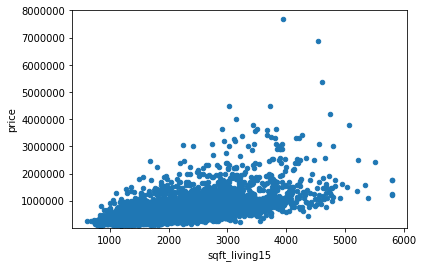

In [41]:
var = 'sqft_living15'
h_train.plot.scatter(x=var, y='price', ylim=(3,8000000));

In [42]:
total = h_train.isnull().sum()

In [45]:
percent = (h_train.isnull().sum()/h_train.isnull().count())

In [51]:
pd.concat([total,percent],axis = 1, keys=['Total', 'Percent'])

,Total,Percent
id,0,0.0
date,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0
view,0,0.0


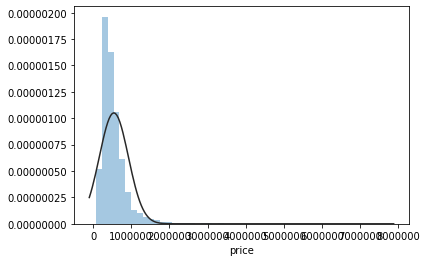

In [59]:
#price
from scipy.stats import norm
from scipy import stats
sns.distplot(h_train['price'], fit=norm, bins=50, kde=False);

In [60]:
#normalization
h_train['price'] = np.log(h_train['price'])

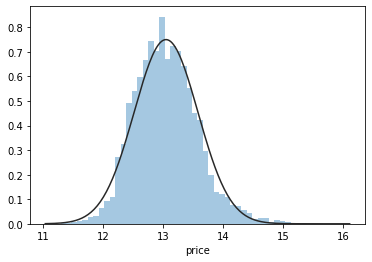

In [61]:
sns.distplot(h_train['price'], fit=norm, bins=50, kde=False);

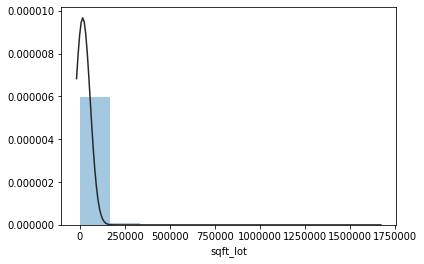

In [70]:
#sqft_lot
sns.distplot(h_train['sqft_lot'], fit=norm, bins=10, kde=False);

In [71]:
h_train['sqft_lot'] = np.log(h_train['sqft_lot'])

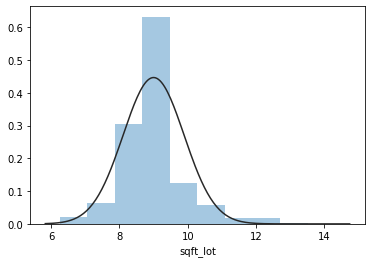

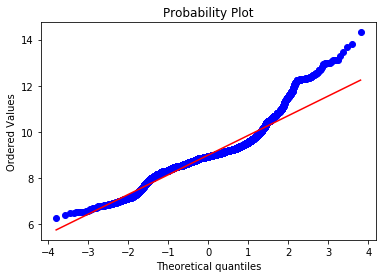

In [80]:
sns.distplot(h_train['sqft_lot'], fit=norm, bins=10, kde=False);
plt.show()
res = stats.probplot(h_train['sqft_lot'], plot=plt)

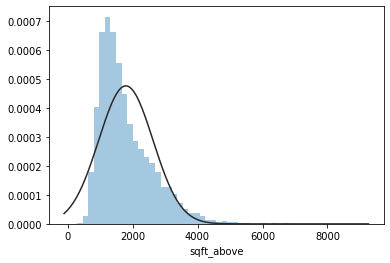

In [64]:
sns.distplot(h_train['sqft_above'], fit=norm, bins=50, kde=False);

In [73]:
h_train['sqft_above'] = np.log(h_train['sqft_above'])

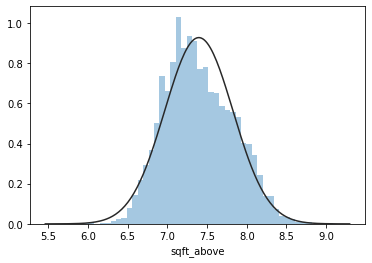

In [74]:
sns.distplot(h_train['sqft_above'], fit=norm, bins=50, kde=False);

In [75]:
h_train['sqft_living'] = np.log(h_train['sqft_living'])

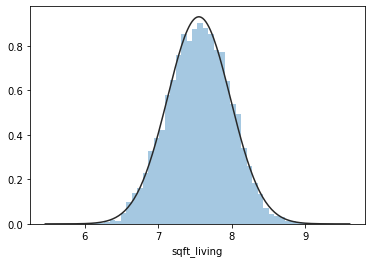

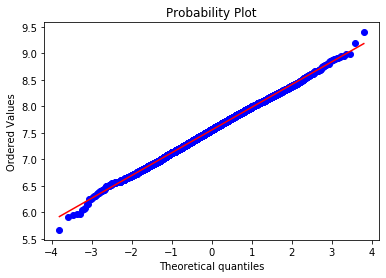

In [79]:
sns.distplot(h_train['sqft_living'], fit=norm, bins=50, kde=False);
plt.show()
res = stats.probplot(h_train['sqft_living'], plot=plt)

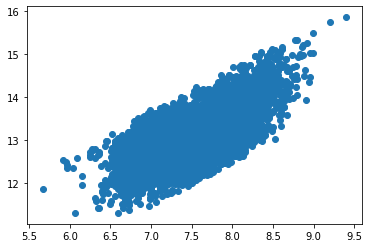

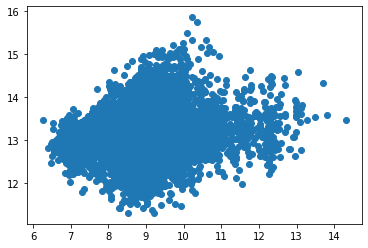

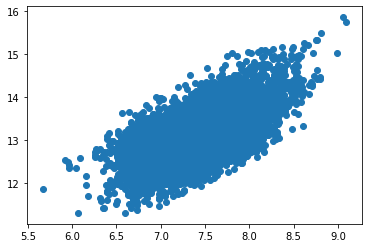

In [82]:
plt.scatter(h_train['sqft_living'], h_train['price']);
plt.show()
plt.scatter(h_train['sqft_lot'], h_train['price']);
plt.show()
plt.scatter(h_train['sqft_above'], h_train['price']);
plt.show()

In [22]:
#temporary
h_train = pd.read_csv('wk3_kc_house_train_data.csv')

In [23]:
h_train['price'] = np.log(h_train['price'])
#h_train['sqft_lot'] = np.log(h_train['sqft_lot'])
h_train['sqft_living'] = np.log(h_train['sqft_living'])
#h_train['sqft_above'] = np.log(h_train['sqft_above'])

In [24]:
X_train = h_train[['bedrooms', 'bathrooms', 'sqft_living' , 'floors','view', 'grade', 'condition', 'sqft_above',
       'sqft_basement','yr_built', 'yr_renovated', 'zipcode', 'lat', 'long','sqft_living15']]
y_train = h_train[['price']]

In [ ]:
#, , 'sqft_lot15','sqft_lot'

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
y_pred = regressor.predict(X_train)

In [26]:
y_pred = np.exp(regressor.predict(X_train))

In [27]:
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_train, y_pred))))

RMSE: 618792.0085427037


In [9]:
antilog = np.exp(y_pred)

C:\Users\Thanis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [10]:
h_test = pd.read_csv('wk3_kc_house_test_data.csv')

In [365]:
h_test['price'] = np.log(h_test['price'])
#h_test['sqft_lot'] = np.log(h_test['sqft_lot'])
#h_test['sqft_above'] = np.log(h_test['sqft_above'])
h_test['sqft_living'] = np.log(h_test['sqft_living'])

In [11]:
X_test = h_test[['bedrooms', 'bathrooms', 'sqft_living', 'floors','view', 'grade', 'condition', 'sqft_above',
       'sqft_basement','yr_built', 'yr_renovated', 'zipcode', 'lat', 'long','sqft_living15']]
y_test = h_test[['price']]

In [12]:
accuracy = regressor.score(X_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 68%'

In [13]:
h_valid = pd.read_csv('wk3_kc_house_valid_data.csv')

In [369]:
h_valid['price'] = np.log(h_valid['price'])
#h_valid['sqft_lot'] = np.log(h_valid['sqft_lot'])
#h_valid['sqft_above'] = np.log(h_valid['sqft_above'])
h_valid['sqft_living'] = np.log(h_valid['sqft_living'])

In [14]:
X_valid = h_valid[['bedrooms', 'bathrooms', 'sqft_living', 'floors','view', 'grade', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15']]
y_valid = h_valid[['price']]

In [15]:
accuracy = regressor.score(X_valid, y_valid)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 69%'

In [21]:
y_pred = np.exp(regressor.predict(X_test))
y_pred

C:\Users\Thanis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


array([[inf],
       [inf],
       [inf],
       ...,
       [inf],
       [inf],
       [inf]])

In [17]:
accuracy = regressor.score(X_train, y_train)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 68%'

In [18]:
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
def get_score(lables, prediction):
    
    print('R2: {}'.format(r2_score(lables, prediction)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(lables, prediction))))

In [20]:
y_pred_train = regressor.predict(X_train)
print("Train")
get_score(y_train, y_pred_train)
y_pred_test = regressor.predict(X_test)
print("Test")
get_score(y_test, y_pred_test )
y_pred_valid = regressor.predict(X_valid)
print("Valid")
get_score(y_valid, y_pred_valid)

Train
R2: 0.6817137561235551
RMSE: 214106.61985815514
Test
R2: 0.6808887574459628
RMSE: 202426.8227707951
Valid
R2: 0.6851537450053249
RMSE: 199851.00801999745


In [381]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.04)


In [382]:
scores = cross_val_score(regressor, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.77 (+/- 0.02)


In [383]:
#cross validation 5-fold
scores = cross_val_score(regressor, X_valid, y_valid, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.01)


In [384]:
from sklearn import ensemble

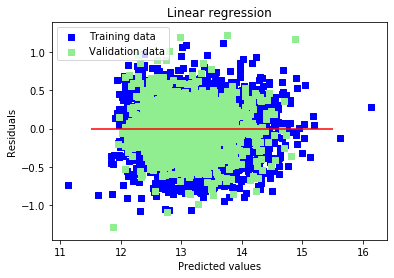

In [394]:
plt.scatter(y_pred_train, y_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_pred_test, y_pred_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 11.5, xmax = 15.5, color = "red")
plt.show()

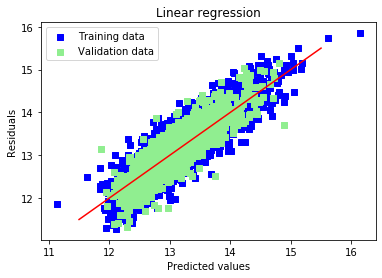

In [396]:
plt.scatter(y_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_pred_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.hlines(y = 0, xmin = 11.5, xmax = 15.5, color = "red")
plt.plot([11.5, 15.5], [11.5, 15.5], c = "red")
plt.show()

In [397]:
from sklearn.metrics import mean_squared_error, make_scorer
scorer = make_scorer(mean_squared_error, greater_is_better = False)
rmse= np.sqrt(-cross_val_score(regressor, X_test, y_test, scoring = scorer, cv = 10)).mean()

In [398]:
rmse

0.259636007888547